<a href="https://colab.research.google.com/github/hgv004/Deep_Learning/blob/master/Deep_Learning/Projects/flower_photos/DL_CNN_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import all required libararies**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
from tensorflow.keras.models import Sequential


# **Dataset Load**

In [2]:
url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 4s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib 
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
path = '/content/datasets/flower_photos'
import os
os.listdir(path)

['sunflowers', 'LICENSE.txt', 'daisy', 'tulips', 'roses', 'dandelion']

In [6]:
class_names = []
for i in os.listdir(path):
  if i.endswith('.txt'):
    pass
  else:
    class_names.append(i)
class_names

['sunflowers', 'daisy', 'tulips', 'roses', 'dandelion']

**glob library is used for fetching the files having specific datatype from the path/folder**

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/14928117202_139d2142cc_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9427945592_07a2676945_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5042785753_392cc4e74d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14144522269_bc20029375_m.jpg')]

In [8]:
len(list(data_dir.glob('*/*.jpg')))

3670

# **Classification**

In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/2273917656_6d6c038283.jpg'),
 PosixPath('datasets/flower_photos/roses/9433167170_fa056d3175.jpg'),
 PosixPath('datasets/flower_photos/roses/5360769702_ec28c53b9e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

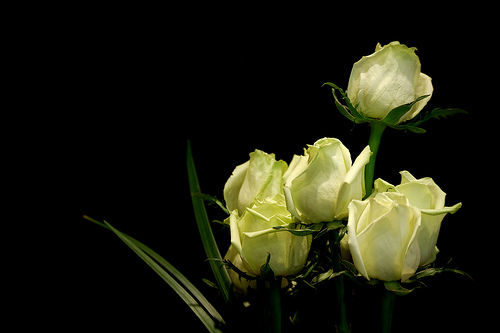

In [10]:
PIL.Image.open(str(roses[6]))     ## PIL is used to view the image file

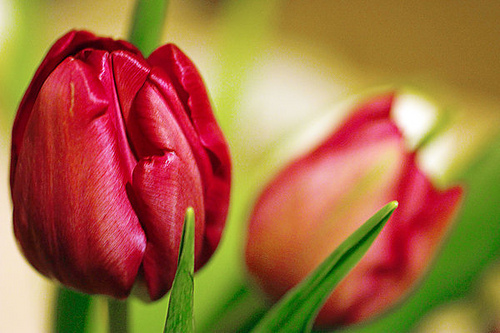

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**Storing all the data into dictionary**

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

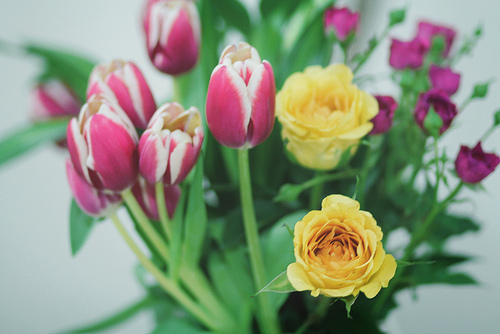

In [14]:
PIL.Image.open(str(flowers_images_dict['roses'][0]))

**Converting the image into the vectors**

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))     ## CV2 is used to convert the image into the array
img.shape

(334, 500, 3)

**Resize all the images into same size**

In [16]:
cv2.resize(img,(180,180)).shape     

(180, 180, 3)

In [17]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
   for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
x[0].shape

(180, 180, 3)

In [19]:
x = np.array(x)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [21]:
print(len(x_train), len(x_test))

2752 918


In [22]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

# **Model Building**

In [23]:
num_classes = len(class_names)

In [24]:
model = Sequential([
    
])

In [25]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 10s 23ms/step - loss: 1.3859 - accuracy: 0.4201
Epoch 2/30
86/86 [==============================] - 2s 23ms/step - loss: 1.0361 - accuracy: 0.5712
Epoch 3/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8954 - accuracy: 0.6523
Epoch 4/30
86/86 [==============================] - 2s 23ms/step - loss: 0.7193 - accuracy: 0.7271
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.5286 - accuracy: 0.8060
Epoch 6/30
86/86 [==============================] - 2s 23ms/step - loss: 0.3273 - accuracy: 0.8834
Epoch 7/30
86/86 [==============================] - 2s 23ms/step - loss: 0.1850 - accuracy: 0.9419
Epoch 8/30
86/86 [==============================] - 2s 23ms/step - loss: 0.1012 - accuracy: 0.9709
Epoch 9/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0751 - accuracy: 0.9786
Epoch 10/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0261 - accuracy: 0.9935
Epoch 11

In [28]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 19ms/step - loss: 3.2779 - accuracy: 0.6351


[3.277933120727539, 0.6350762248039246]

In [31]:
predictions = model.predict(x_test_scaled)
predictions

29/29 [==============================] - 0s 13ms/step


array([[ -1.7887409 ,  27.765705  ,  -8.60211   , -25.89025   ,
          2.4174347 ],
       [  0.87825954,   1.0692708 , -28.314953  , -14.093665  ,
         29.848064  ],
       [-11.829509  ,   3.0080857 ,  14.066813  ,  -9.554929  ,
          3.4460151 ],
       ...,
       [  7.0554323 , -16.382732  ,  -9.966524  ,  13.711464  ,
         13.934934  ],
       [ 10.305665  ,  -3.601192  ,  -6.1123743 ,  -1.3130926 ,
          8.689798  ],
       [ -7.8649745 , -13.362473  ,  13.009409  ,  23.340372  ,
         -6.0913363 ]], dtype=float32)

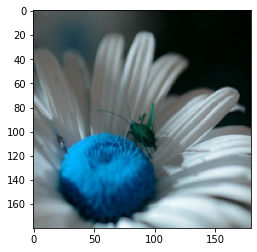

In [55]:
plt.imshow(x_test[39])

In [32]:
predictions.shape

(918, 5)

In [67]:
flowers_labels_dict.keys()

dict_keys(['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips'])

In [34]:
np.argmax(predictions[0])

1

In [ ]:
np.argmax(score)

1

In [70]:
answer = list(flowers_labels_dict.keys())[np.argmax(predictions[0])]
answer

'daisy'

In [ ]:
y_test[0]

1

In [33]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.4610582e-13, 1.0000000e+00, 1.6056817e-16, 4.9832872e-24,
       9.8036102e-12], dtype=float32)>

# **Data Augmentation**

In [71]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

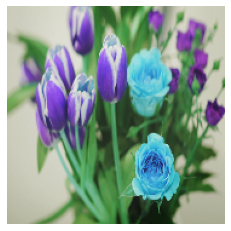

In [72]:
plt.axis('off')
plt.imshow(x[0])

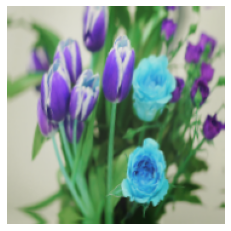

In [73]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [74]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 4s 40ms/step - loss: 1.2622 - accuracy: 0.4629
Epoch 2/30
86/86 [==============================] - 3s 40ms/step - loss: 1.0336 - accuracy: 0.5901
Epoch 3/30
86/86 [==============================] - 3s 39ms/step - loss: 0.9327 - accuracy: 0.6272
Epoch 4/30
86/86 [==============================] - 3s 40ms/step - loss: 0.8738 - accuracy: 0.6646
Epoch 5/30
86/86 [==============================] - 3s 40ms/step - loss: 0.7911 - accuracy: 0.6995
Epoch 6/30
86/86 [==============================] - 3s 40ms/step - loss: 0.7661 - accuracy: 0.7049
Epoch 7/30
86/86 [==============================] - 3s 39ms/step - loss: 0.7286 - accuracy: 0.7278
Epoch 8/30
86/86 [==============================] - 3s 41ms/step - loss: 0.6732 - accuracy: 0.7380
Epoch 9/30
86/86 [==============================] - 3s 40ms/step - loss: 0.6597 - accuracy: 0.7504
Epoch 10/30
86/86 [==============================] - 3s 40ms/step - loss: 0.6303 - accuracy: 0.7627
Epoch 11/

In [75]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 15ms/step - loss: 1.0507 - accuracy: 0.7102


[1.050685167312622, 0.7102396488189697]

# **Testing on google Image**

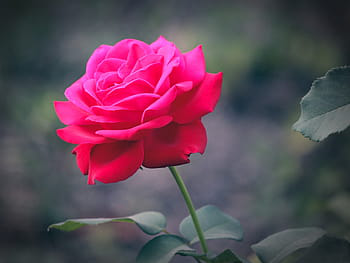

In [94]:
image = '/content/rose-flower-flowers-red-rose-royalty-free-thumbnail.jpg'
PIL.Image.open(image)

In [88]:
img_array = cv2.imread(image)
img_array = cv2.resize(img_array, (180, 180))
img_array.shape

(180, 180, 3)

In [90]:
img_array = np.array(img_array)  ## shape needed to add
img_array.shape

(1, 180, 180, 3)

In [91]:
x_test_scaled.shape

(918, 180, 180, 3)

In [96]:
img_array_scaled = img_array/255
predict1 = list(flowers_labels_dict.keys())[np.argmax(model.predict(img_array_scaled))]
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(predict1, 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to roses with a 100.00 percent confidence.
